In [245]:
""" Importing all the required libraries """

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option("display.max_columns", 52) # 45

In [246]:
df_all_season_batting = pd.read_csv("all_season_batting_card.csv")

In [247]:
df_2024_season_batting = pd.read_csv("season_batting_card.csv")

In [248]:
combined_df_batting = pd.concat([df_all_season_batting, df_2024_season_batting])

In [249]:
combined_df_batting.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16664 entries, 0 to 943
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           16664 non-null  int64  
 1   match_id         16664 non-null  int64  
 2   match_name       16664 non-null  object 
 3   home_team        16664 non-null  object 
 4   away_team        16664 non-null  object 
 5   venue            16664 non-null  object 
 6   city             16664 non-null  object 
 7   country          16664 non-null  object 
 8   current_innings  16664 non-null  object 
 9   innings_id       16664 non-null  int64  
 10  name             16664 non-null  object 
 11  fullName         16664 non-null  object 
 12  runs             16658 non-null  float64
 13  ballsFaced       16658 non-null  float64
 14  minutes          16658 non-null  object 
 15  fours            16658 non-null  float64
 16  sixes            16658 non-null  float64
 17  strikeRate       16

In [250]:
df_IPL_Batsman = combined_df_batting[["season", "name", "fullName", "runs", "strikeRate"]]

In [251]:
df_IPL_MostRuns = combined_df_batting[[ "name", "runs"]]
df_IPL_MostRuns.head(2)

,name,runs
0,DP Conway,1.0
1,RD Gaikwad,92.0


In [252]:
df_batting_teamname = combined_df_batting[["season", "current_innings", "fullName", "runs"]]

In [253]:
df_batting_teamname_agg = df_batting_teamname.groupby(["fullName","current_innings"])["runs"].sum().sort_values(ascending=False).reset_index().head(10)

In [254]:
df_batting_teamname_agg

,fullName,current_innings,runs
0,Virat Kohli,RCB,7944.0
1,Rohit Sharma,MI,5371.0
2,Suresh Raina,CSK,4687.0
3,MS Dhoni,CSK,4669.0
4,AB de Villiers,RCB,4491.0
5,David Warner,SRH,4014.0
6,Sanju Samson,RR,3682.0
7,Shikhar Dhawan,SRH,3487.0
8,Kieron Pollard,MI,3412.0
9,Rishabh Pant,DC,3251.0


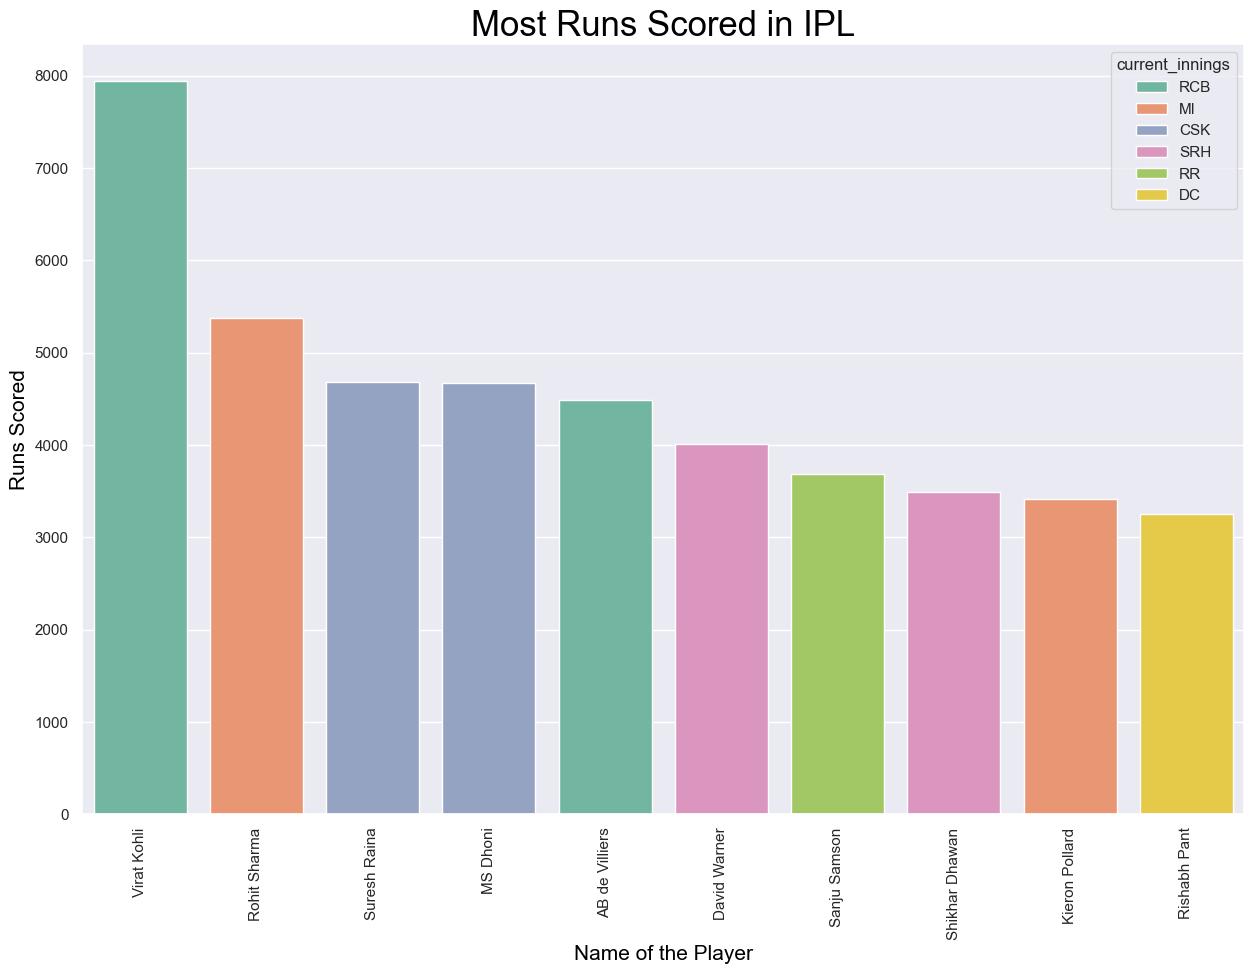

In [255]:
colors = "Set2" #"flare" #["flare"] # ,"#2B5DA8","#32A6DE" "#E9530D"
# sns.set_palette(sns.color_palette(colors))
sns.set(rc={"figure.figsize":(15,10)})
sns.barplot(x=df_batting_teamname_agg["fullName"], y=df_batting_teamname_agg["runs"], palette=colors, hue=df_batting_teamname_agg["current_innings"])
plt.xticks(rotation=90)
plt.title("Most Runs Scored in IPL",fontsize=25, color="black")
plt.xlabel("Name of the Player",fontsize=15, color="black")
plt.ylabel("Runs Scored",fontsize=15, color="black")
plt.show()

In [256]:
df_season_agg = df_batting_teamname.groupby(["fullName","current_innings","season"])["runs"].sum().sort_values(ascending=False).reset_index().head(10)

In [257]:
df_season_agg

,fullName,current_innings,season,runs
0,Virat Kohli,RCB,2016,973.0
1,Shubman Gill,GT,2023,890.0
2,Jos Buttler,RR,2022,863.0
3,David Warner,SRH,2016,848.0
4,Kane Williamson,SRH,2018,735.0
5,Chris Gayle,RCB,2012,733.0
6,Michael Hussey,CSK,2013,733.0
7,Faf du Plessis,RCB,2023,730.0
8,Chris Gayle,RCB,2013,708.0
9,David Warner,SRH,2019,692.0


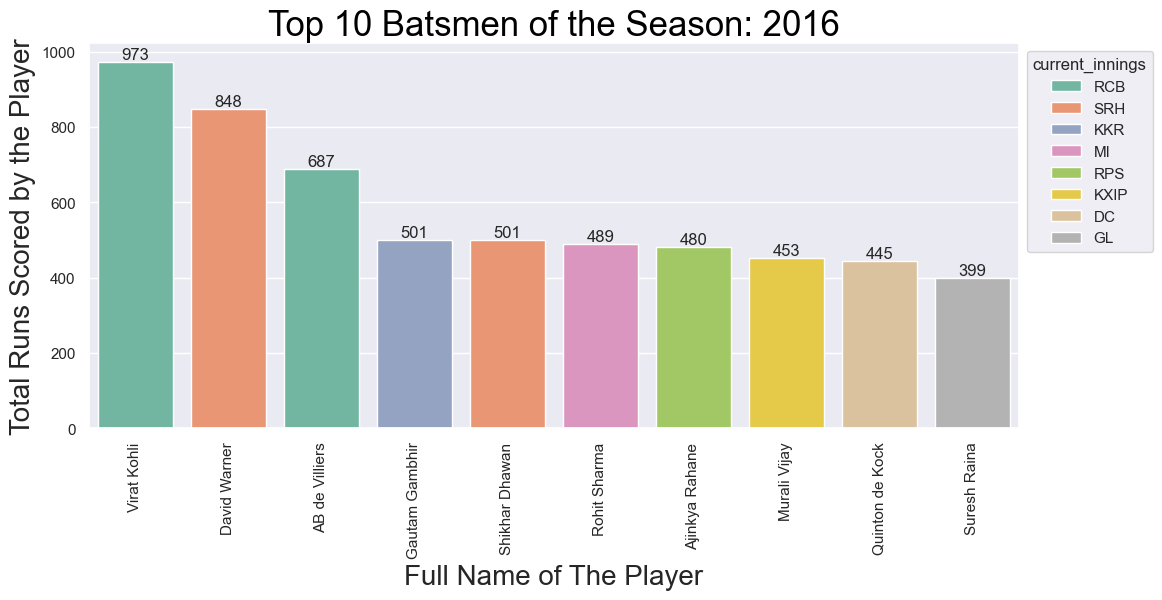

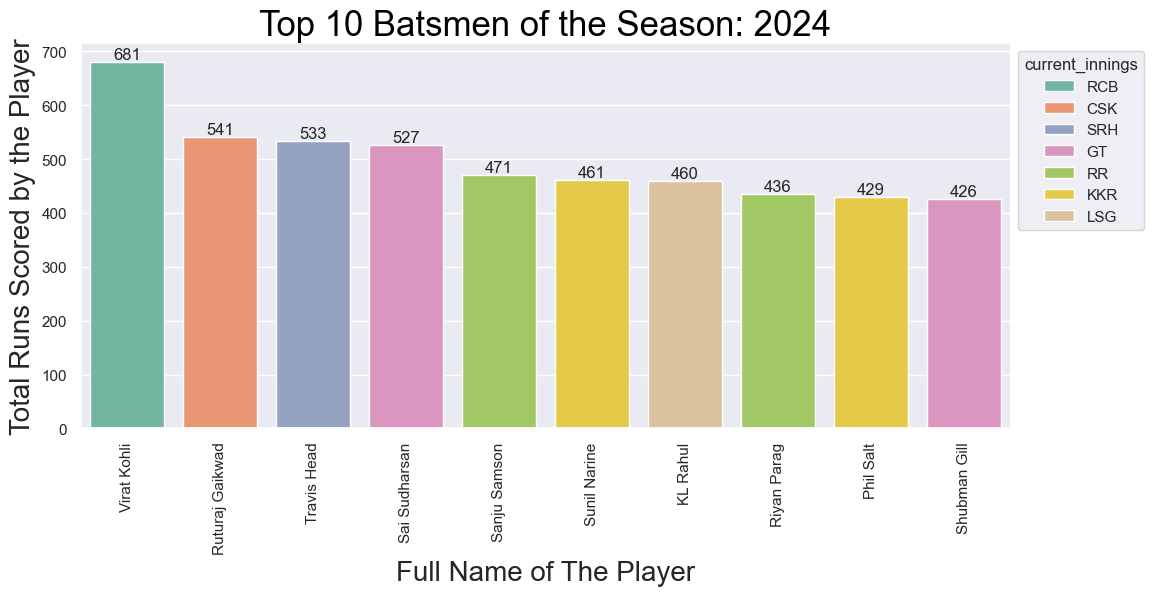

In [258]:

def bar_plot_chart(season):
    
    """ Filtering all the batsman for the season and then getting top 10 of them """
    df_by_season = df_batting_teamname[df_batting_teamname["season"]==season]
    top_10_batters = df_by_season.groupby(["fullName","current_innings"])["runs"].sum().sort_values(ascending=False).reset_index().head(10)
    
    """ Increasing the plot size using 'sns.set' and 'rc' parameter to it. """
    sns.set_theme(rc={"figure.figsize":(12,5)})
    title = f"Top 10 Batsmen of the Season: {season}"
    plt.xticks(rotation=90)
    plt.title(title, fontsize=25, color="black")
    plt.xlabel("Full Name of The Player", fontsize=20)
    plt.ylabel("Total Runs Scored by the Player", fontsize=20)
    # sns.barplot(x=top_10_batters["fullName"], y=top_10_batters["runs"], palette= colors, hue=top_10_batters["current_innings"])
    ax = sns.barplot(x=top_10_batters["fullName"], y=top_10_batters["runs"], palette= colors, hue=top_10_batters["current_innings"])
    
    # moving the legend
    sns.move_legend(ax,"upper left", bbox_to_anchor=(1,1))
     
    """ For loop to place the value on top of each bar """
    for val in ax.containers:
        ax.bar_label(val)
    
    
    plt.show()
    
bar_plot_chart(2016)

bar_plot_chart(2024)

# Generating same plot as above by using Plotly library

In [259]:
import plotly.express as px


team_color ={
    "MI"  : "#004B8D",
    "GT"  : "#1B2133",
    "SRH" : "#EE7429",
    "RCB" : "#E5B582",
    "CSK" : "#FFFF3C",
    "LSG" : "#0057E2",
    "KKR" : "#3A225D",
    "PBKS": "#DD1F2D",
    "RR"  : "#074EA2",
    "DC"  : "#282968"
}


def barchart_usingPlotly(season):
    df_by_season = df_batting_teamname[df_batting_teamname["season"]==season]
    top_10_batters = df_by_season.groupby(["fullName","current_innings"])["runs"].sum().sort_values(ascending=False).reset_index().head(10)
    title = f"Top 10 Batsmen of the Season: {season}"
    fig = px.bar(top_10_batters, x="fullName", y="runs",
                 hover_data=["fullName","runs"], color="current_innings", color_discrete_map= team_color,
                 labels= "Toatal Runs", text="runs", title= title
                 )
    # fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False) x="fullName" xaxis_title="Date", yaxis_title="7 day avg"
    fig.update_layout(width=900,xaxis_title="Full Name of the Player", yaxis_title="Total Runs Scored")
    
    
    fig.show()
    
barchart_usingPlotly(2012)

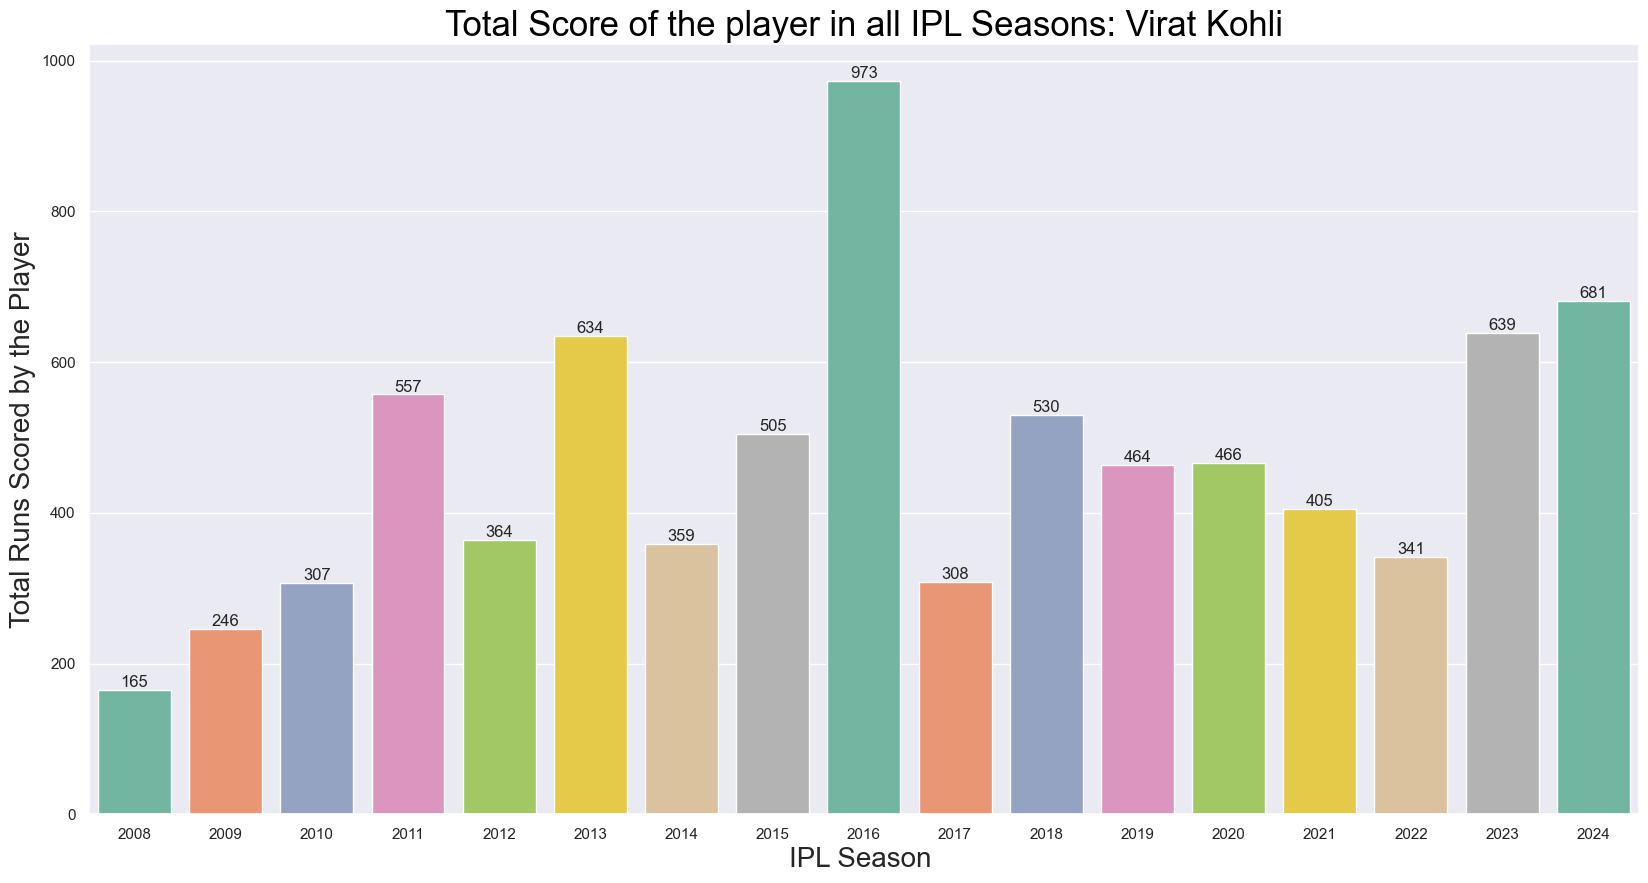

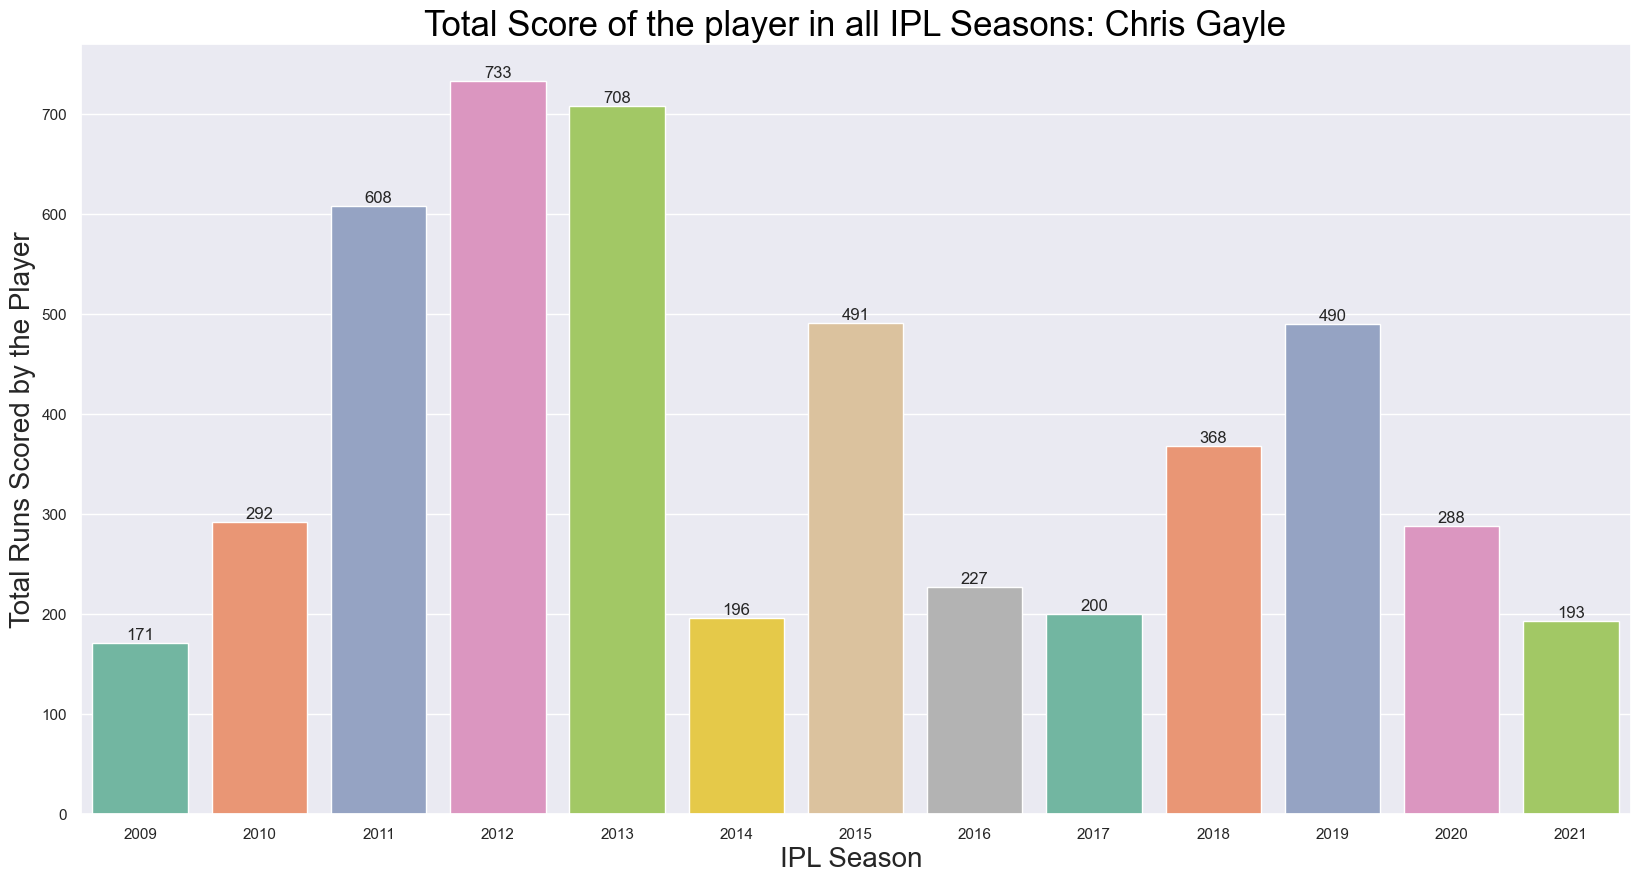

In [260]:
def barchart_players(name):

    runs= df_batting_teamname.groupby(["season","fullName"])["runs"].sum().reset_index()
    player_ipl_runs= runs[runs["fullName"]==name]
    
    """ Increasing the plot size using 'sns.set' and 'rc' parameter to it. """
    sns.set_theme(rc={"figure.figsize":(20,10)})
    title = f"Total Score of the player in all IPL Seasons: {name}"
  
    plt.title(title, fontsize=25, color="black")
    plt.xlabel("IPL Season ", fontsize=20)
    plt.ylabel("Total Runs Scored by the Player", fontsize=20)
    # sns.barplot(data=player_ipl_runs, x="season", y='runs', palette= colors)  #countplot(x="fullName", data=player_ipl_runs, palette= colors)
    # ax = sns.barplot(x=player_ipl_runs["fullName"], y=player_ipl_runs["runs"], palette= colors, hue=player_ipl_runs["season"])
    ax = sns.barplot(data=player_ipl_runs, x="season", y='runs', palette= colors, hue="season", legend=False)
    
    
    for val in ax.containers:
        ax.bar_label(val)
    
    plt.show()
    
barchart_players("Virat Kohli")

barchart_players("Chris Gayle")

In [261]:
def barchart_plotly_player(name): 

    runs= df_batting_teamname.groupby(["season","fullName"])["runs"].sum().reset_index()
    player_ipl_runs= runs[runs["fullName"]==name]
    
    team_color ={
    "2008"  : "#004B8D",
    "2009"  : "#1B2133",
    "2010"  : "#EE7429",
    "2011"  : "#E5B582",
    "2012" : "#FFFF3C",
    "2013" : "#0057E2",
    "2014" : "#3A225D",
    "2015" : "#DD1F2D",
    "2016" : "#074EA2",
    "2017" : "#282968",
    "2018" : "#411f30",
    "20119": "#d33928",
    "2020" : "#fcba03",
    "2021" :"#3e6473",
    "2022" : "#05f2cb",
    "2023" : "#8a2be2",
    "2024" : "#411f30"
    }
   
    # sns.set_theme(rc={"figure.figsize":(20,10)})
    title = f"Total Score of the player in each Season: {name}"
    fig = px.bar(player_ipl_runs, x="season", y='runs',
                 hover_data=["fullName","runs"], color="season", color_discrete_map= team_color,
                 labels= "Toatal Runs", text="runs", title= title
                 )
    fig.show()
    
barchart_plotly_player("Virat Kohli")

barchart_plotly_player("MS Dhoni")

barchart_plotly_player("Krunal Pandya")


In [262]:
df_batting_teamname_agg = df_batting_teamname.groupby(["fullName","current_innings"])["runs"].sum().sort_values(ascending=False).reset_index().head(10)

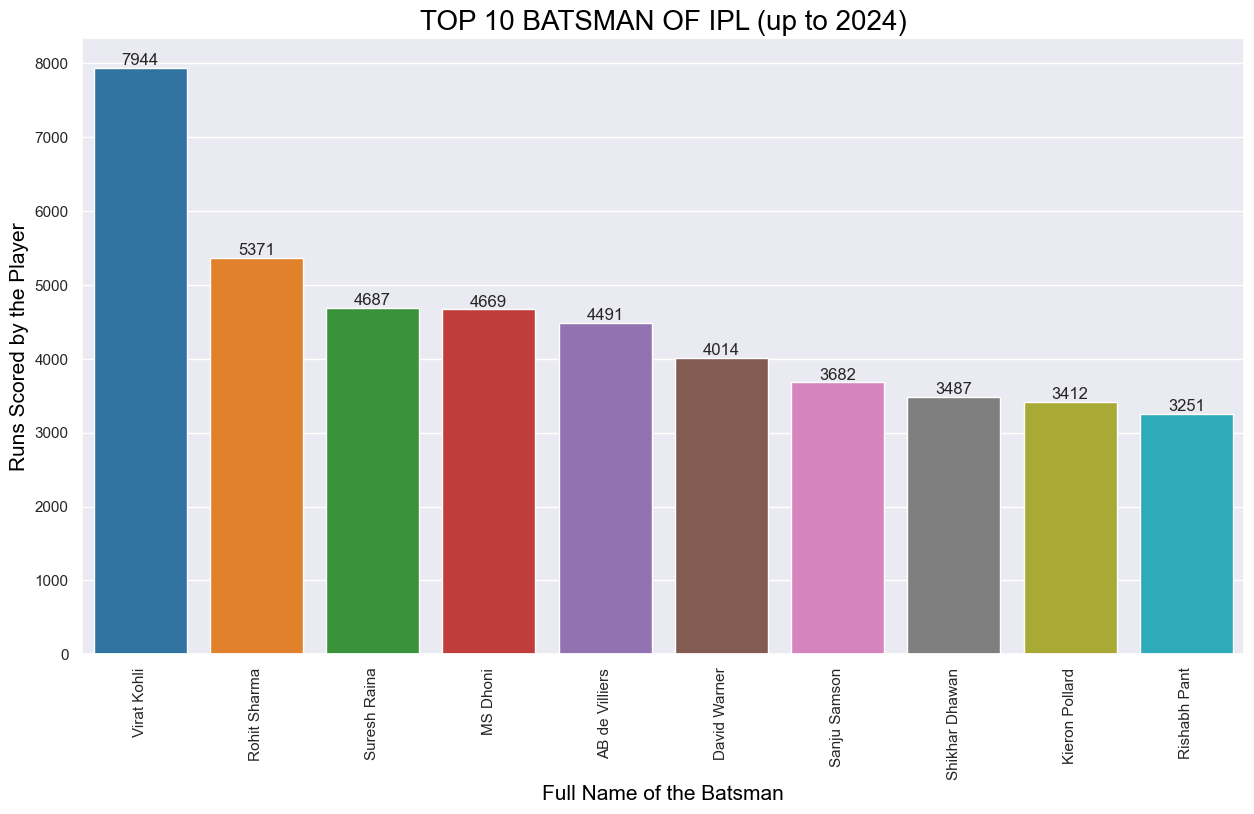

In [ ]:

def Top_10_batsman_ipl():
    
   df_batting_teamname_agg = df_batting_teamname.groupby(["fullName","current_innings"])["runs"].sum().sort_values(ascending=False).reset_index().head(10)
   
   sns.set_theme(rc={"figure.figsize" : (15,8)})
   plt.xticks(rotation=90)
   plt.title("TOP 10 BATSMAN OF IPL (up to 2024)", fontsize=20, color= "black")
   plt.xlabel("Full Name of the Batsman", fontsize=15, color="black")
   plt.ylabel("Runs Scored by the Player", fontsize=15, color="black")
   ax= sns.barplot(x=df_batting_teamname_agg["fullName"], y=df_batting_teamname_agg["runs"], 
                   palette='tab10', hue=df_batting_teamname_agg["fullName"], legend=False)
   
   for val in ax.containers:
      ax.bar_label(val)
   
   plt.show()
    
Top_10_batsman_ipl()

In [264]:

def ipl_top10_batsman():
        
    player_color ={
        "2008"  : "#004B8D",
        "2009"  : "#1B2133",
        "2010"  : "#EE7429",
        "2011"  : "#E5B582",
        "2012" : "#FFFF3C",
        "2013" : "#0057E2",
        "2014" : "#3A225D",
        "2015" : "#DD1F2D",
        "2016" : "#074EA2",
        "2017" : "#282968",
        "2018" : "#411f30",
        "20119": "#d33928",
        "2020" : "#fcba03",
        "2021" :"#3e6473",
        "2022" : "#05f2cb",
        "2023" : "#8a2be2",
        "2024" : "#411f30"
        }
    df_batting_teamname_agg = df_batting_teamname.groupby(["fullName","current_innings"])["runs"].sum().sort_values(ascending=False).reset_index().head(10)

    fig = px.bar(df_batting_teamname_agg, x="fullName", y="runs",
                  hover_data=["fullName", "runs"], color="fullName", color_discrete_map=player_color,
                  labels= "Toatal Runs", text="runs", title= " Top 10 Batsman of IPL (Up to 2024)"
                 )
    
    fig.show()
    
    
ipl_top10_batsman()


# Checking number of Boundaries the Batsman Score to reach the score.

In [265]:
boundaries = combined_df_batting[["season","fullName","runs","fours","sixes"]] 

boundaries.head(1)
# ,"sixes" "season",
runs_4_6_df = boundaries.groupby(["season","fullName"])[["runs","fours","sixes"]].sum().reset_index()

runs_4_6_df[(runs_4_6_df["fullName"]=="AB de Villiers") ] #& (runs_4_6_df["season"]==2008)

,season,fullName,runs,fours,sixes
0,2008,AB de Villiers,95.0,5.0,1.0
155,2009,AB de Villiers,465.0,39.0,12.0
308,2010,AB de Villiers,111.0,7.0,0.0
475,2011,AB de Villiers,312.0,21.0,14.0
656,2012,AB de Villiers,319.0,26.0,15.0
828,2013,AB de Villiers,360.0,34.0,15.0
1004,2014,AB de Villiers,395.0,26.0,24.0
1140,2015,AB de Villiers,513.0,60.0,22.0
1270,2016,AB de Villiers,687.0,57.0,37.0
1410,2017,AB de Villiers,216.0,12.0,16.0


In [274]:

def total_noof_4_6(fours,sixes):
    
    val_fours = 4 * fours
    val_sixes = 6 * sixes
    
    total_boundaries = val_fours + val_sixes
    return total_boundaries

""" creating a new column 'total_boundaries' which is runs scored in Boundaries out of overal score"""

runs_4_6_df["total_boundaries"] = runs_4_6_df.apply(lambda x:total_noof_4_6(x["fours"],x["sixes"]), axis=1)


def boundary_percent(total_boundaries,runs):
    if total_boundaries !=0:
            
        boundary_percent = (total_boundaries/runs) * 100
        # print(round(boundary_percent,2))
        return round(boundary_percent,2)

""" creating a new column 'boundary_percent' which is the percentage of runs scored in boundaries   """

runs_4_6_df["boundary_percent"] = runs_4_6_df.apply(lambda x: boundary_percent(x["total_boundaries"], x["runs"]), axis=1)

runs_4_6_df

,fullName,runs,fours,sixes,total_boundaries,boundary_percent
season,,,,,,
2008,AB de Villiers,95.0,5.0,1.0,26.0,27.37
2008,Aakash Chopra,42.0,5.0,0.0,20.0,47.62
2008,Abdur Razzak,0.0,0.0,0.0,0.0,NaN
2008,Abhinav Mukund,0.0,0.0,0.0,0.0,NaN
2008,Abhishek Nayar,206.0,16.0,9.0,118.0,57.28
...,...,...,...,...,...,...
2024,Washington Sundar,0.0,0.0,0.0,0.0,NaN
2024,Will Jacks,189.0,13.0,16.0,148.0,78.31
2024,Wriddhiman Saha,136.0,18.0,3.0,90.0,66.18


In [267]:
runs_4_6_df["boundary_percent"].fillna({"boundary_percent":0},inplace=True)

/var/folders/rv/7081c9ws011__m65sb36mhs00000gq/T/ipykernel_81507/3946915661.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [269]:
runs_4_6_df.set_index("season",inplace=True)

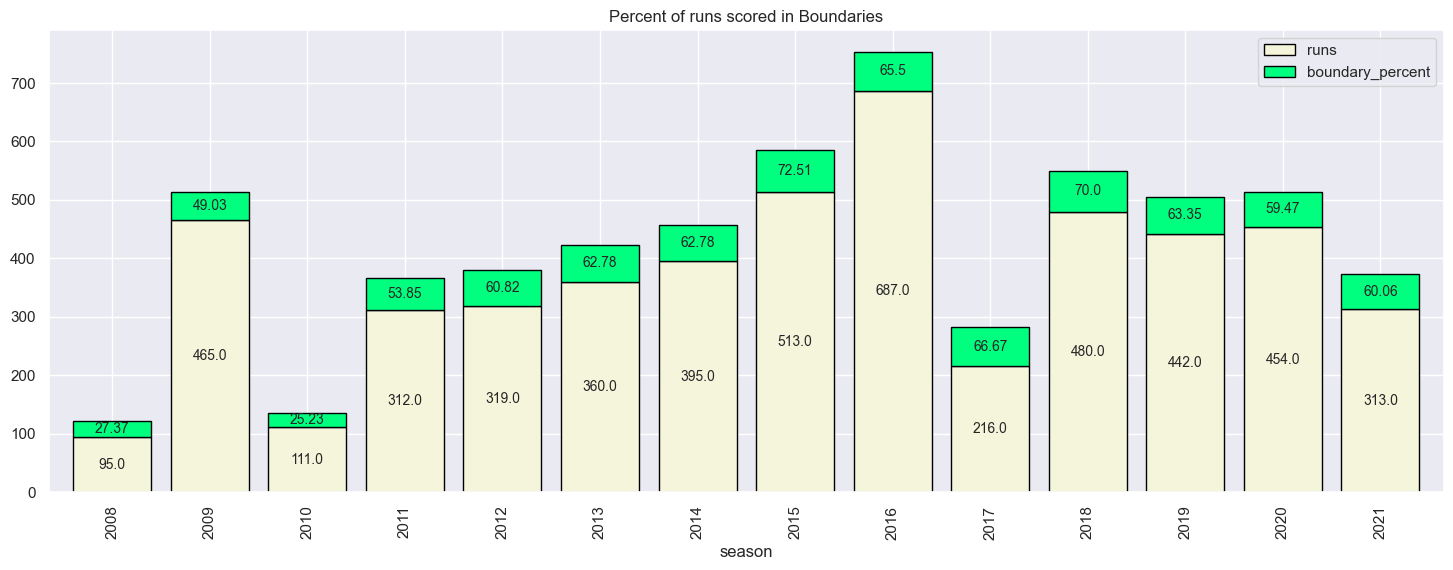

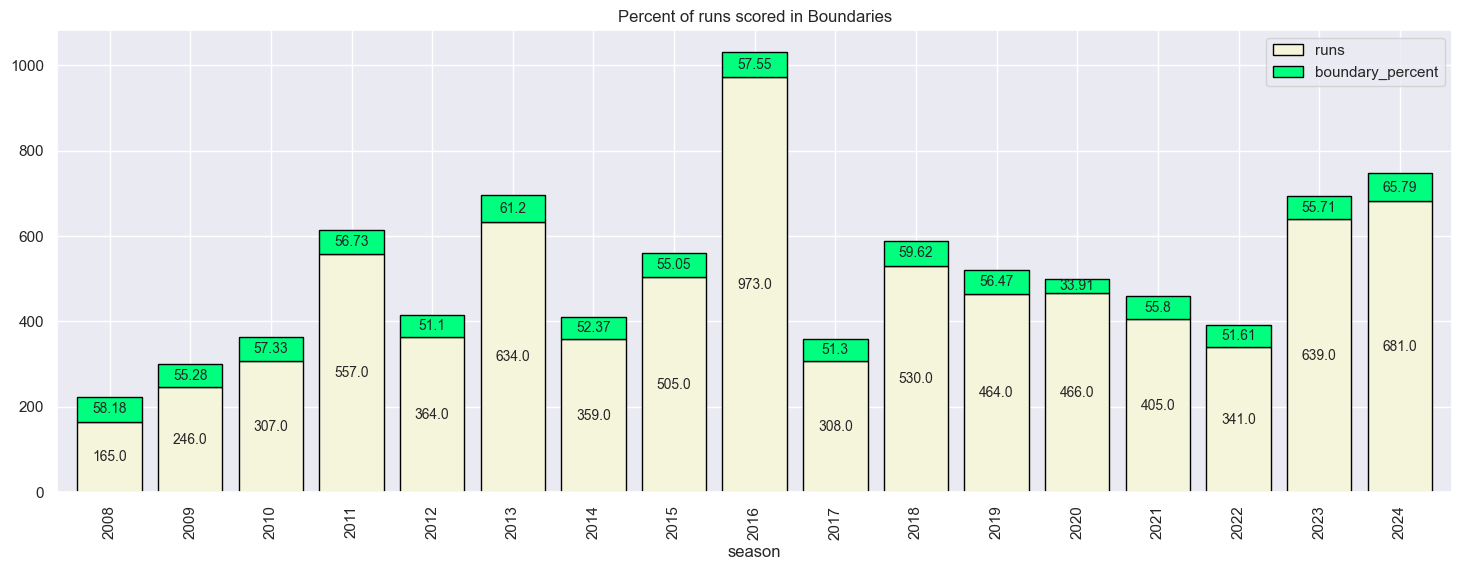

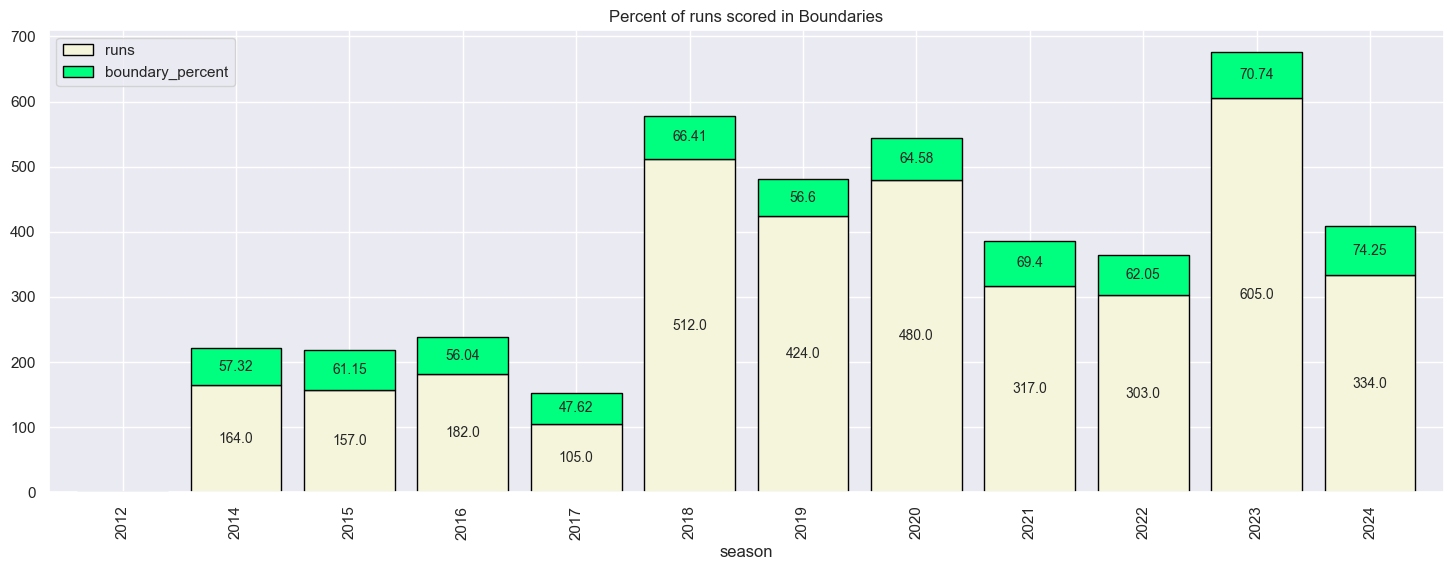

In [ ]:
def stackedbarplot(name):
    
    player_boundaries = runs_4_6_df[runs_4_6_df["fullName"]==name]
    
    fig,ax = plt.subplots(figsize=(18,6))
    player_boundaries[["runs","boundary_percent"]].plot(kind="bar", stacked = True, ax=ax, width=0.8,title= "Percent of runs scored in Boundaries",
                                                        edgecolor="black",color=["Beige","SpringGreen"])
    
    # Add labels
    for c in ax.containers:
        labels = [str(round(v.get_height(), 2))  if v.get_height() > 0 else '' for v in c]
        ax.bar_label(c,
                    label_type='center',
                    labels = labels,
                    size = 10) # add a container object "c" as first 
    
    plt.show()
    
stackedbarplot("AB de Villiers")

stackedbarplot("Virat Kohli")

stackedbarplot("Suryakumar Yadav")
